## Desafío - Regresión desde la econometría

* Para poder realizar este desafío debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv). 
* Una vez terminado el desafío, comprime la carpeta y sube el .zip


### Contexto

En este desafío trabajaremos con un registro de clientes de un banco e información sobre su salud financiera. 

La base contenida en el csv Credit contiene las siguientes variables:


* Income : Ingreso anual disponible en miles de dólares. 

* Limit : Límite del crédito.

* Rating : Ranking del crédito.

* Cards : Cantidad de tarjetas de credito.

* Age : Edad del usuario.

* Education : Años de educación del usuario.

* Gender : ¿Hombre o mujer?

* Student : ¿Es estudiante?

* Married : ¿Está casado?

* Ethnicity : Etnicidad del usuario (Caucásico, Afroamericano, Asiático) 

* Balance : Promedio de deuda en tarjeta de crédito de usuario


Para efectos prácticos del desafío, nos interesa saber sobre los determinantes de la variación en el promedio de deuda en tarjeta de crédito.

A lo largo del desafío generaremos modelos econométricos para inspeccionar los efectos de distintos atributos.

#### Desafío 1: Prepare el ambiente de trabajo

Importe las librerías básicas para el análisis de datos.

Incluya los import base de statsmodels .

Importe la base de datos Credit.csv y elimine la columna Unnamed: 0 .

Siguiendo las buenas prácticas, genere variables binarias para capturar el efecto del grupo minoritario en cada variable. Para el caso de Ethnicity , genere binarias para AfricanAmerican y Asian .

* tip: Utilice value_counts() para revisar la cantidad de casos en las variables categóricas.


In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
df = pd.read_csv("Credit.csv").drop("Unnamed: 0", axis = 1)

In [41]:
df.sample(10)

Income  Limit  Rating  Cards  Age  Education  Gender Student Married  \
381  101.788   8029     574      2   84         11    Male      No     Yes   
123   11.808   1300     117      3   77         14  Female      No      No   
310   33.694   4891     369      1   52         16    Male     Yes      No   
23    64.027   5179     398      5   48          8    Male      No     Yes   
10    63.095   8117     589      4   30         14    Male      No     Yes   
370   35.610   6135     466      4   40         12    Male      No      No   
66   113.829   9704     694      4   38         13  Female      No     Yes   
104   15.846   4768     365      4   53         12  Female      No      No   
398   37.728   2525     192      1   44         13    Male      No     Yes   
336   32.856   5884     438      4   68         13    Male      No      No   

            Ethnicity  Balance  
381         Caucasian      849  
123  African American        0  
310  African American     1036  
23   African American      411  
10          Caucasian     1407  
370         Caucasian      992  
66              Asian     1388  
104         Caucasian      745  
398         Caucasian        0  
336         Caucasian      926

In [125]:


# separemos todas las variables que son categóricas
categorical_columns = ['Gender', 'Student', 'Married', 'Ethnicity']
# iniciamos un loop para cada variable categórica donde:
for cat in categorical_columns:
# imprimimos el nombre
    print("\n",cat)
# solicitamos la frecuencia relativa de cada categoría dentro de la variable
    print(df[cat].value_counts())
# solicitamos el porcentaje de la frecuencia relativa
    print((df[cat].value_counts()/len(df[cat])))



 Gender
Female    207
 Male     193
Name: Gender, dtype: int64
Female    0.5175
 Male     0.4825
Name: Gender, dtype: float64

 Student
No     360
Yes     40
Name: Student, dtype: int64
No     0.9
Yes    0.1
Name: Student, dtype: float64

 Married
Yes    245
No     155
Name: Married, dtype: int64
Yes    0.6125
No     0.3875
Name: Married, dtype: float64

 Ethnicity
Caucasian           199
Asian               102
African American     99
Name: Ethnicity, dtype: int64
Caucasian           0.4975
Asian               0.2550
African American    0.2475
Name: Ethnicity, dtype: float64


In [126]:
tmp = df.copy()
tmp['bin_Gender']=np.where(tmp['Gender'] == 'Female', 0, 1)
tmp['bin_Student']=np.where(tmp['Student'] == 'No', 0, 1)
tmp['bin_Married']=np.where(tmp['Married'] == 'No', 0, 1)
tmp['bin_Ethnicity']=np.where(tmp['Ethnicity'] == 'African American', 0, 1)
tmp.sample(100)

Income  Limit  Rating  Cards  Age  Education  Gender Student Married  \
179   58.026   7499     560      5   67         11  Female      No      No   
82    23.672   4433     344      3   63         11    Male      No      No   
112   46.007   6637     491      4   42         14    Male      No     Yes   
325   17.765   5072     364      1   66         12  Female      No     Yes   
279   54.319   3063     248      3   59          8  Female     Yes      No   
130   23.793   3821     281      4   56         12  Female     Yes     Yes   
207   10.842   4391     358      5   37         10  Female     Yes     Yes   
233   11.603   2278     187      3   71         11    Male      No     Yes   
1    106.025   6645     483      3   82         15  Female     Yes     Yes   
219   38.954   5222     370      4   76         13  Female      No      No   
352  104.483   7140     507      2   41         14    Male      No     Yes   
316   52.179   7306     522      2   57         14    Male      No      No   
221   98.515   8760     633      5   78         11  Female      No      No   
334   24.230   4756     351      2   64         15  Female      No     Yes   
72    22.939   4923     355      1   47         18  Female      No     Yes   
196   93.039   7398     517      1   67         12    Male      No     Yes   
326  125.480  10230     721      3   82         16    Male      No     Yes   
370   35.610   6135     466      4   40         12    Male      No      No   
238   26.532   2910     236      6   58         19  Female      No     Yes   
66   113.829   9704     694      4   38         13  Female      No     Yes   
232   15.741   4788     360      1   39         14    Male      No     Yes   
388   37.878   6827     482      2   80         13  Female      No      No   
383   14.292   3274     282      9   64          9    Male      No     Yes   
303   44.061   4970     352      1   79         11    Male      No     Yes   
43    36.929   6257     445      1   24         14  Female      No     Yes   
280   53.401   5319     377      3   35         12  Female      No      No   
318   18.951   1485     129      3   82         13  Female      No      No   
227   66.989   5614     430      3   47         14  Female      No     Yes   
278  128.040   6982     518      2   78         11  Female      No     Yes   
248   15.717    905      93      1   38         16    Male     Yes     Yes   
..       ...    ...     ...    ...  ...        ...     ...     ...     ...   
310   33.694   4891     369      1   52         16    Male     Yes      No   
111   28.575   2959     231      2   60         11  Female      No      No   
289   10.852   3907     296      2   30          9    Male      No      No   
57    76.273   4779     367      4   65         14  Female      No     Yes   
70    24.889   3954     318      4   75         12    Male      No     Yes   
307   75.406   3874     298      3   41         14  Female      No     Yes   
96    14.312   5382     367      1   59         17    Male     Yes      No   
8     15.125   3300     266      5   66         13  Female      No      No   
76    30.622   3293     251      1   68         16    Male     Yes      No   
144   17.392   2748     228      3   32         14    Male      No     Yes   
194   30.406   2120     181      2   79         14    Male      No     Yes   
201   73.914   7333     529      6   67         15  Female      No     Yes   
165   25.383   4527     367      4   46         11    Male      No     Yes   
202   21.038   1448     145      2   58         13  Female      No     Yes   
314  115.520   9272     656      2   69         14    Male      No      No   
125   27.578   2531     195      1   34         15  Female      No     Yes   
271   44.978   4866     347      1   30         10  Female      No      No   
54    15.333   1499     138      2   47          9  Female      No     Yes   
79    15.354   2101     171      2   65         14    Male      No      No   
75    33.017   3180     224 

### Desafío 2: Genere gráficos descriptivos para las variables contínuas

Genere una función llamada plot_hist que genere un histograma de la variable e indique la media y mediana de la misma. 

Agrege una legenda para indicar qué representa cada línea.

¿Cuál es el comportamiento de Balance , Income , Cards y Rating ?

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt

def binarize_histogram(tmp, bin_col,variable):
    
    hist_0 = tmp[tmp[bin_col] == 0][variable].dropna()
    hist_1 = tmp[tmp[bin_col] == 1][variable].dropna()
    g = sns.FacetGrid( tmp, col = bin_col , height = 5, aspect =0.9 , col_wrap = 2 , margin_titles =True)
    g = g.map(sns.distplot,variable,kde=False)
    axes = g.axes.flatten()
    axes[0].axvline(np.mean(hist_0), ls='-')
    axes[1].axvline(np.mean(hist_1), ls='-')
    axes[0].axvline(np.median(hist_0), ls='-',color='tomato')
    axes[1].axvline(np.median(hist_1), ls='-',color='tomato')

    axes[0].set_title("Balance trabajador".format(variable, round(np.mean(tmp[variable]), 3)))
    axes[1].set_title("Balance estudiante".format(variable, round(np.mean(tmp[variable]), 3)))
    
    plt.style.use('seaborn') # gráficos estilo seaborn
    plt.rcParams["figure.figsize"] = (10, 6) # Tamaño gráficos
    plt.rcParams["figure.dpi"] = 200 # resolución gráficos
    plt.setp(g.fig.texts, text="")
    plt.legend(loc='upper right')

    

No handles with labels found to put in legend.


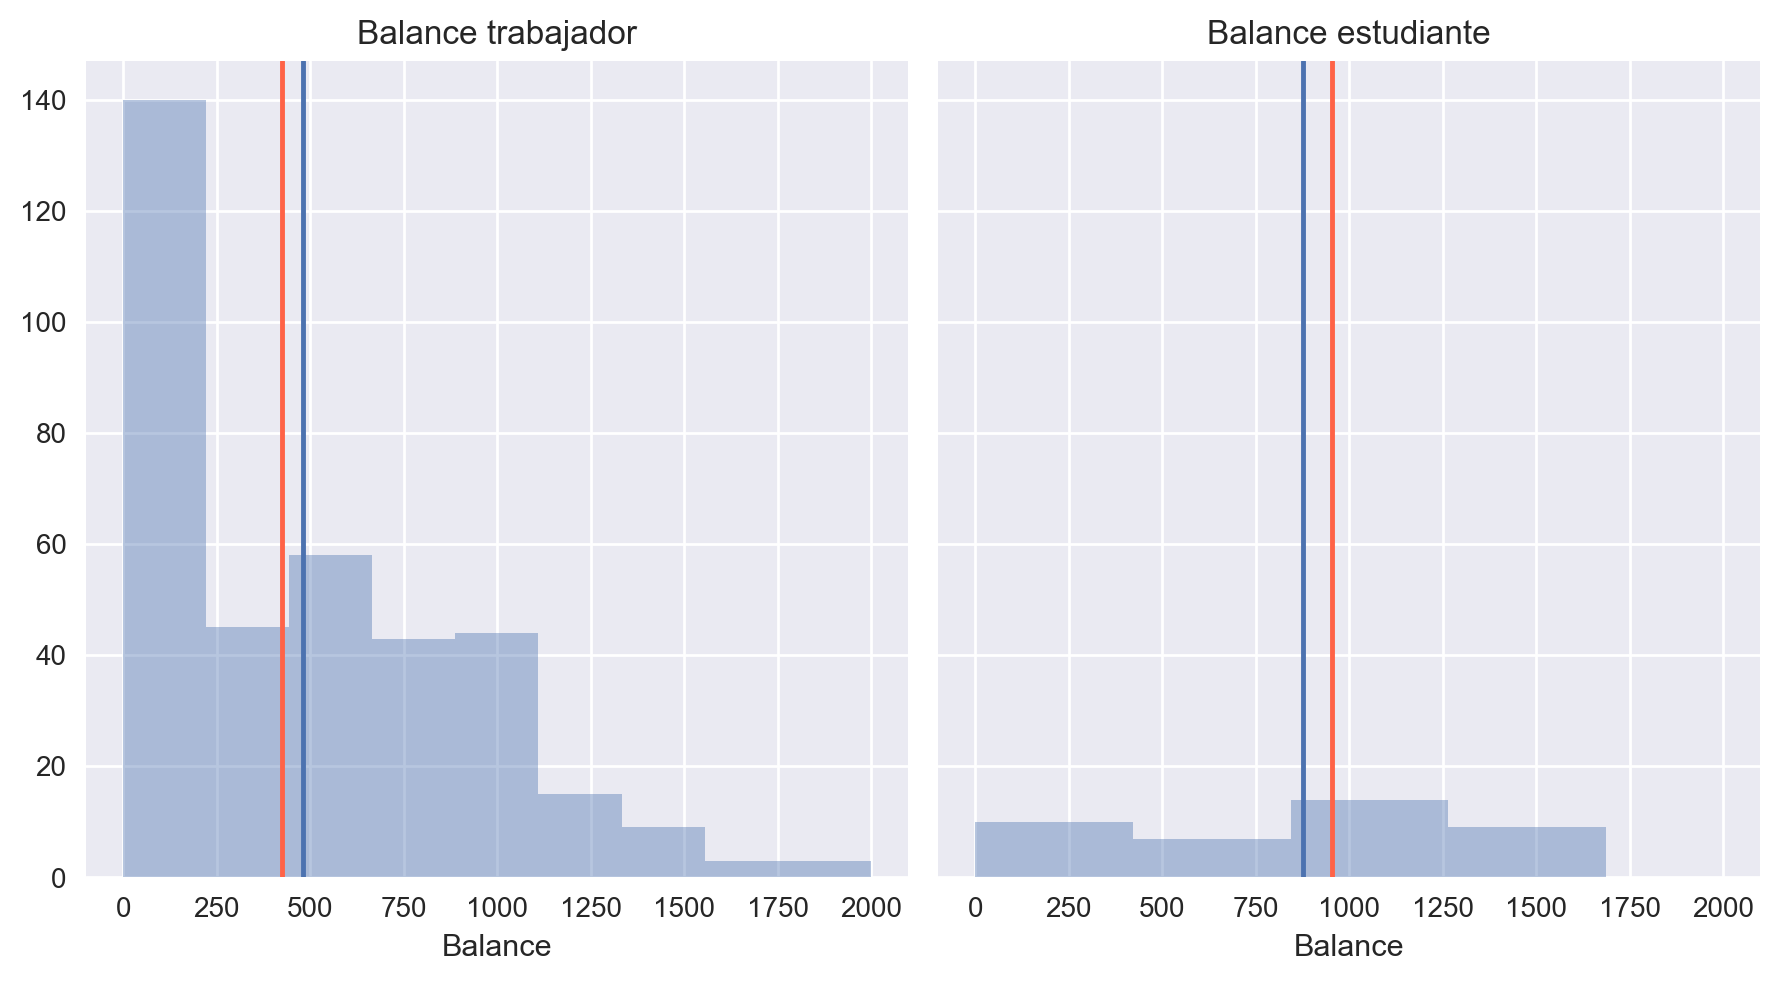

In [158]:
binarize_histogram(tmp, "bin_Student","Balance");